# Intuitions on Convolutions

Let's build intuitions about these **`convolution operations`**.

**Goals**
- `Compute` convolution operations
- `Visualize` 
    - convolution kernels
    - the effects of a convolution kernel applied on images

<hr>

**Convolutional Neural Networks are Neural Networks specifically designed to work on images**. 

This is made possible thanks to **`convolutions`**.

These specific mathematical operations apply a **`kernel`** to an input image and creates an output representation. The name of this **`output`** can change depending on the community. Here, let's talk about the output as the **`output of a layer`**, as in standard NN models. But for CNNs, it can also be called :
* a **`"convoluted representation/feature"`**,
* or a **`"convolution"`**,
* or also an **`"activation"`** (as it corresponds to the activation of a given layer).

<img src="convolution.png" width="300">

⚠️ It is important to understand that **the same kernel, i.e. the same weights, are applied to different zones of the images**. 

⚠️ This is completely different from Dense Neural Networks that we've been working with.
* Indeed, in `Dense/"Fully Connected" Neural Network`, each weight of each neuron is related to only one input coordinate (which in this case would be each pixel).
* Here in a `Convolution Neural Network`, the weights of a kernel are not applied to only one input, i.e. one pixel, but to different pixels, "step by step" !

👉 You can think of each kernel (or each filter in the case of colored images) as a **`magnifying glass`** through which you see the image. Similarly to your eyes, kernels cannot capture everything in a picture at once, but they ***scan different parts of a picture before understanding the whole picture which is being analyzed***.

🎬 So let's have a closer look at `convolution operations`, and their impact in `Convolutional Neural Networks`.

## The dataset

❓ First use the following function to load the data:

⚠️ Do not change anything !

⚠️ Restrict from any desire to change the shapes or types of the outputs! This will have an impact on further questions.

In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data("data")


❓ Check the shape of your data. Especially, why an additional dimension of size 1 for X?

In [2]:
# YOUR CODE HERE
print(X.shape)
print(y.shape)

(200, 76, 78, 1)
(200,)


❓ Do the input images need some normalization? ❓

❓ Display some images with `plt.imshow` and their respective labels (the images are black and white, therefore use `cmap=gray` in the dedicated matplotlib function - otherwise, you will get unrelevant and weird colors).

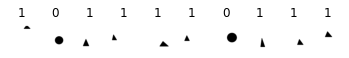

In [3]:
# YOUR CODE HERE
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

# Choose some random indices from the train set
indices = np.random.randint(0, len(X), size=10)

# Plot the selected images with grayscale colormap
for i, index in enumerate(indices):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[index], cmap='gray')
    plt.title(y[index])
    plt.axis('off')

plt.show()


❓ How many classes are we going to predict are there? 



In [4]:
# YOUR CODE HERE

# Part 1. Kernels

The following function performs a **`convolution operation`**, i.e. **it applies a kernel to an image**.

⚠️ Be careful ! 
* A "_convolution_ operation" in CNN is different from a "_convolution_ operation" in Signal Preprocessing. 
* For instance, the `numpy.convolve` function does NOT compute the convolution in the Deep Learning - CNN sense.

⚠️ Another warning, this `compute_convolution` is simplified:
* Convolutions are a bit more complex as they also involve `padding` and `strides`. 

⚠️ Vocabulary: 
* "Convolution" sometimes refers to _one_ operation. 
* It can also refer to the  convolution operations repeated on the entire image.
* When you are dealing with convolutions, make sure to align with your classmates/colleagues on what you are talking about.

❓ Load the function and go through the lines to understand what it is doing.

In [5]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height-kernel_height):
        arr = []
        
        for y in range(img_width - kernel_width):
            
            a = np.multiply(img[x:x+kernel_height, y:y+kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

❓ Apply the `compute_convolution`  with the following kernel to any image from the input dataset. 

* Display both the input image and output image
* Do you see differences ?

In [6]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

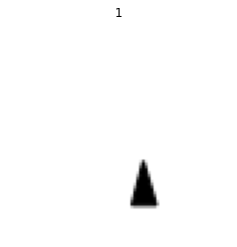

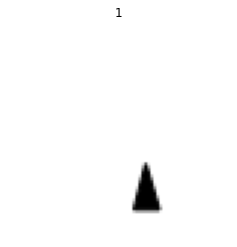

In [7]:
# YOUR CODE HERE
img = X[1]
img_out = compute_convolution(img, identity_kernel)

plt.imshow(img, cmap='gray')
plt.title(y[1])
plt.axis('off')
plt.show()

plt.imshow(img_out, cmap='gray')
plt.title(y[1])
plt.axis('off')
plt.show()


The previous kernel corresponds to the **`identity_ kernel`**, meaning that the output is equal to the input... It basically does nothing to the input image. You can easily figure this out by thinking about the operation it does on the image : only one pixel per convolution operation is kept as the other are multiplied by 0.

❓ `plot_convolution` with the following `kernel_1`, once on an triangle and once on a circle.

In [8]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

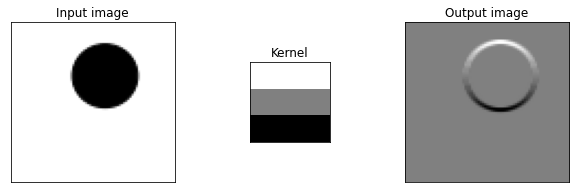

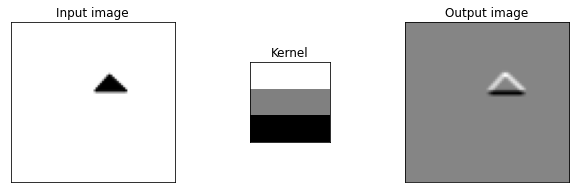

In [9]:
# YOUR CODE HERE
circles_X = X[y == 0]
triangle_X = X[y == 1]

img_c = circles_X[1]
img_t = triangle_X[1]

plot_convolution(img_c, kernel_1, activation=False)
plot_convolution(img_t, kernel_1, activation=False)


❓ Let's try to understand why this is meaningful. First, white colors correspond to high values and black to low values. In a neural network, just after a regular neuron or a convolution, there is an activation function. When the activation function is a relu, it just correponds to setting the negative values to 0.

Well, let's see what it means in the case of a CNN. Re-run the previous functions with activation set to True (in this case, the activation fuction is the relu)..

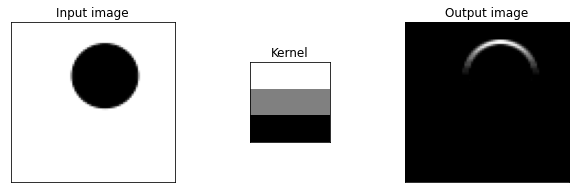

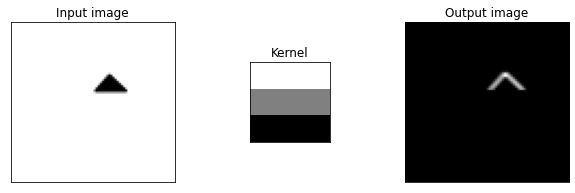

In [10]:
# YOUR CODE HERE
plot_convolution(img_c, kernel_1, activation=True)
plot_convolution(img_t, kernel_1, activation=True)

❓ This kernel is actually highlighting the edges in a given direction. 

* Try the following kernels to check the different edges it can detect.

In [11]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

# YOUR CODE HERE

kernel: [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
just after a regular neuron


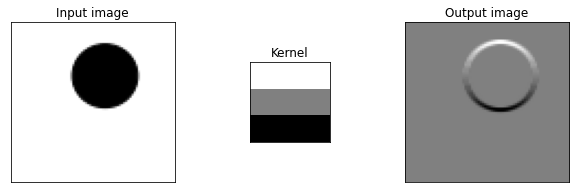

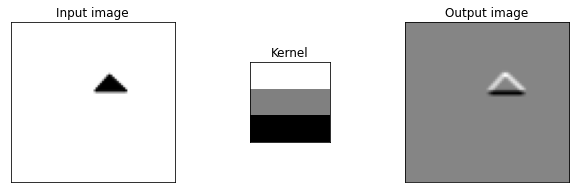

in this case, the activation fuction is the relu


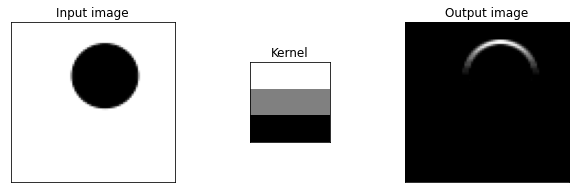

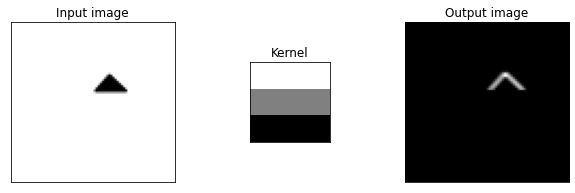

kernel: [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
just after a regular neuron


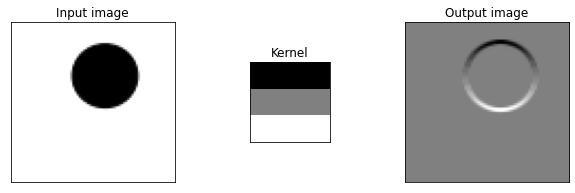

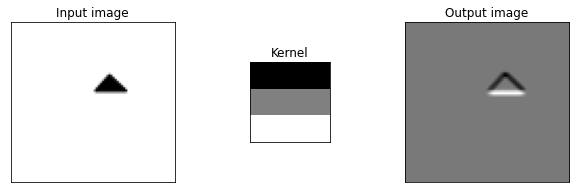

in this case, the activation fuction is the relu


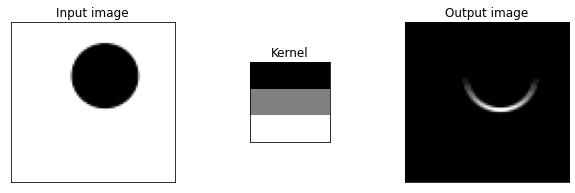

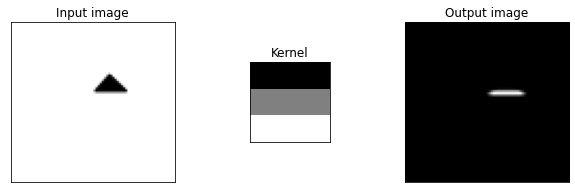

kernel: [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
just after a regular neuron


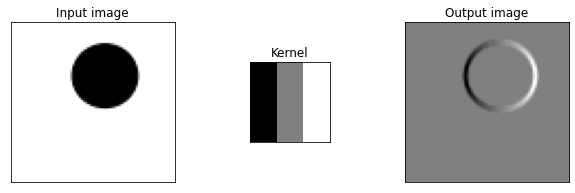

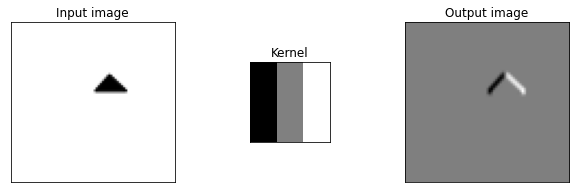

in this case, the activation fuction is the relu


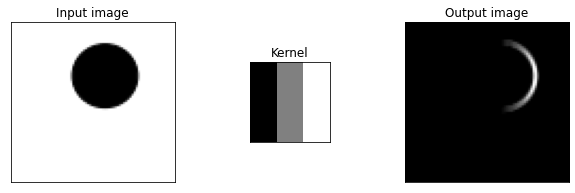

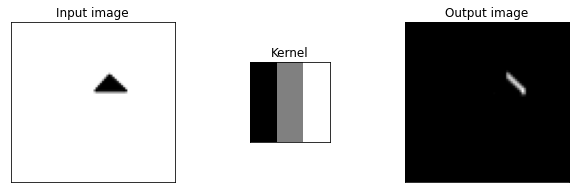

kernel: [[1, 0, -1], [1, 0, -1], [1, 0, -1]]
just after a regular neuron


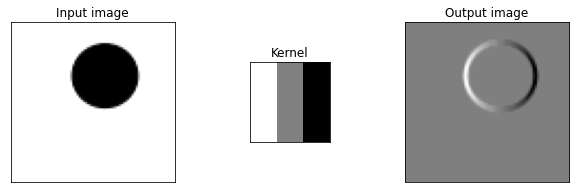

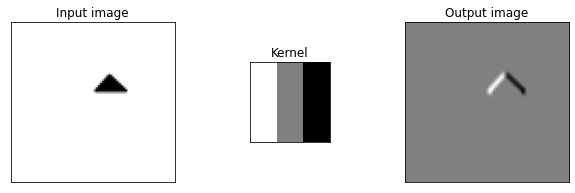

in this case, the activation fuction is the relu


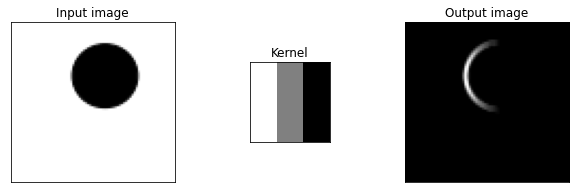

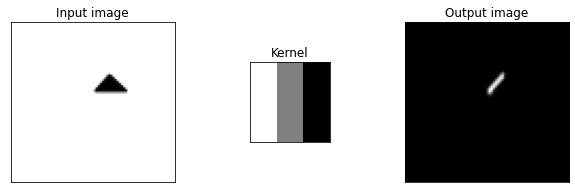

In [12]:
# YOUR CODE HERE

kernel = [kernel_1] + [kernel_2] + [kernel_3] + [kernel_4]
for i  in kernel:
    print(f"kernel: {i}")
    print("just after a regular neuron")
    plot_convolution(img_c, i, activation=False)
    plot_convolution(img_t, i, activation=False)
    print("in this case, the activation fuction is the relu")
    plot_convolution(img_c, i, activation=True)
    plot_convolution(img_t, i, activation=True)

❓ **What is the `effect of kernel size`**? 

👇 Check it out with a larger kernel of shape (10,10) down below:

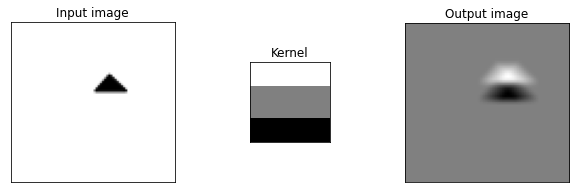

In [13]:
kernel_big = np.array([
    np.ones((10,)),
    np.ones((10,)),
    np.ones((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.ones((10,))*-1,
    np.ones((10,))*-1,
    np.ones((10,))*-1,
])
# YOUR CODE HERE
#kernel_big = np.resize(kernel_big, (10,10))

# for k in kernel_big:
#     print(k)
#     plot_convolution(img_c, k, activation=False)
#     plot_convolution(img_t, k, activation=False)
    
plot_convolution(img_t, kernel_big, activation=False)

### ❓ Feel free to try any other kernel

In [14]:
random_kernel = np.random.uniform(-10, 10, (5, 5))
# YOUR CODE HERE
X.shape


(200, 76, 78, 1)

Now that you've got the idea of what a convolution operation does to an image, let's see how it goes with a "real" Convolutional Neural Network.

# Part 2. Convolutional Neural Network


❓ Write a convolutional network that has 
- a Convolutional Layer with 16 filters with (4, 4) kernels.
- a Convolutional Layer with 32 filters with (3, 3) kernels.
- a Convolutional Layer with 32 filters with (3, 3) kernels.
- a Convolutional Layer with 32 filters with (2, 2) kernels.

with:
- A Max-Pooling Layer (with a (2, 2) pool-size) after each convolution.
- A Hidden Dense Layer with the size of your choice, be reasonable:
    - after the flattening part 
    - but before the last layer


Also, make sure to compile your model with the adequate parameters

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalMaxPooling2D
from keras.models import Sequential

def initialize_model():
# YOUR CODE HERE

    model = Sequential()

    # Convolutional Layer with 16 filters with (4, 4) kernels
    model.add(Conv2D(16, (4, 4), activation='relu', input_shape=(76, 78, 1)))
    # Max-Pooling Layer (with a (2, 2) pool-size)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer with 32 filters with (3, 3) kernels
    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max-Pooling Layer (with a (2, 2) pool-size)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer with 32 filters with (3, 3) kernels
    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max-Pooling Layer (with a (2, 2) pool-size)
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer with 32 filters with (2, 2) kernels
    model.add(Conv2D(32, (2, 2), activation='relu'))
    # Max-Pooling Layer (with a (2, 2) pool-size)
    model.add(GlobalMaxPooling2D())

    # Flattening
    model.add(Flatten())

    # Hidden Dense Layer with size of 256
    model.add(Dense(256, activation='relu'))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))
    return model




model = initialize_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


❓ Fit the model. You should achieve a accuracy of at least 90. Here, the point is not to bother with overfitting, so do not worry much as you would have to if you have a high score.

In [109]:
# YOUR CODE HERE
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



#model.fit(X, y, epochs=10, batch_size=32, validation_split = 0.3)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


2/2 [==============================] - 0s 14ms/step - loss: 0.1079 - accuracy: 0.9667
Test accuracy: 0.9666666388511658


Epoch 1/10
5/5 [==============================] - 1s 70ms/step - loss: 0.6874 - accuracy: 0.5571 - val_loss: 0.6671 - val_accuracy: 0.4667
Epoch 2/10
5/5 [==============================] - 0s 60ms/step - loss: 0.6494 - accuracy: 0.6143 - val_loss: 0.6006 - val_accuracy: 0.6167
Epoch 3/10
5/5 [==============================] - 0s 60ms/step - loss: 0.5889 - accuracy: 0.6286 - val_loss: 0.4838 - val_accuracy: 0.9333
Epoch 4/10
5/5 [==============================] - 0s 60ms/step - loss: 0.4675 - accuracy: 0.9143 - val_loss: 0.3038 - val_accuracy: 0.9667
Epoch 5/10
5/5 [==============================] - 0s 61ms/step - loss: 0.3155 - accuracy: 0.9143 - val_loss: 0.1584 - val_accuracy: 0.9833
Epoch 6/10
5/5 [==============================] - 0s 63ms/step - loss: 0.2162 - accuracy: 0.9143 - val_loss: 0.2185 - val_accuracy: 0.9000
Epoch 7/10
5/5 [==============================] - 0s 61ms/step - loss: 0.2335 - accuracy: 0.9071 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 8/10
5/5 [===========

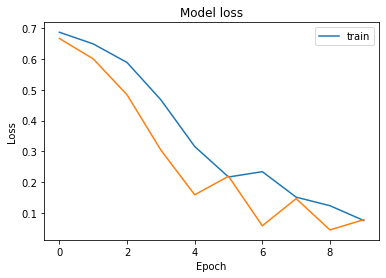

In [17]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split = 0.3)

# Extract the training loss history
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']
# Plot the training loss history
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## Kernels

🔥 It is possible to **`retrieve the values of the different kernels in the CNN`**. 

👍 First, remember that for a Sequential Neural Network (Convolutional or Dense), you can:
- print the `.summary()` to display the layers and the number of weights/parameters involved
- access the differents `.layers` of your model

❓ Print the different layers of your CNN model.

In [21]:
# YOUR CODE HERE
model.summary()
print(model.layers[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 75, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 37, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 35, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

❓ Print the summary of your CNN model.

❓ **Question** ❓
Have a look at the following method that returns the `values/weights of a kernel` depending on:
- the `layer number`, 
    - which can be only `0 `, `2`, `4` or `6` as , as we used 4 `Conv2D - convolutional layers`, each of them followed by a `MaxPool2D` layer
- the `kernel number`
- the `channel number`

With the following table, you will have a better overview of the different weights, kernels and filters involved in the CNN you've built earlier:

| layer_number | convolution_layer | kernel_number | channel_number |
|--------------|-------------------|---------------|----------------|
| 0            | conv2D no 1       | 16            | 1              |
| 2            | conv2D no 2       | 32            | 16             |
| 4            | conv2D no 3       | 64            | 32             |
| 8            | conv2D no 4       | 64            | 64             |





❓  Using **`plot_convolution(activation=True)`**, display some kernels from the FIRST convolutional layer, along with the activation output, to see what the model has learnt from it.

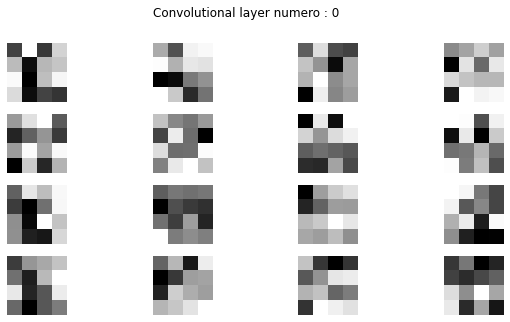

In [29]:
# First Conv2D Layer --> 16 kernels - 4x4 
from keras import backend as K


def display_kernel (model, layer, subplot_x, subplot_y, nb_kernel):
    # get the weights of the first convolutional layer
    weights = model.layers[layer].get_weights()[0]

    # Plot the first 8 kernels
    fig, axes = plt.subplots(subplot_x, subplot_y, figsize=(10, 5))
    axes = axes.ravel()

    for i in range(nb_kernel):
        axes[i].imshow(weights[:, :, 0, i], cmap='gray')
        axes[i].axis('off')
    plt.suptitle("Convolutional layer numero : " + str(layer))
    plt.show()

    
layers_number = 0 # je récupère le layer n° 0 (conv2D no 1)
nb_filters = model.layers[layers_number].filters # je récupère le nombre de filtre du layer
subplot_y = int(nb_filters / 4) # je divise par 4 pour le subplot avec le nombre de filtre (ça donnera 4 lignes de X filtres)

# avec tous les éléments du dessus, j'appelle ma fonction pour afficher les kernels
display_kernel(model, layers_number, 4, subplot_y, nb_filters)


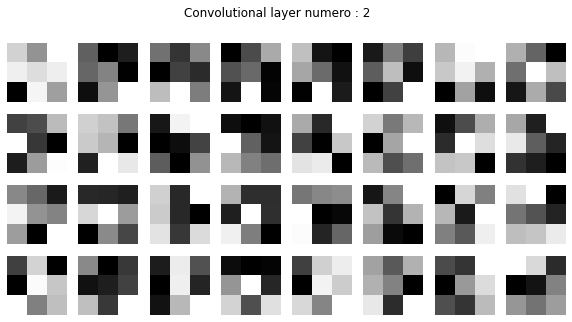

In [31]:
# Second Conv2D Layer --> 32 kernels - 3x3 
layers_number = 2 # je récupère le layer n° 0 (conv2D no 1)
nb_filters = model.layers[layers_number].filters # je récupère le nombre de filtre du layer
subplot_y = int(nb_filters / 4) # je divise par 4 pour le subplot avec le nombre de filtre (ça donnera 4 lignes de X filtres)

# avec tous les éléments du dessus, j'appelle ma fonction pour afficher les kernels
display_kernel(model, layers_number, 4, subplot_y, nb_filters)


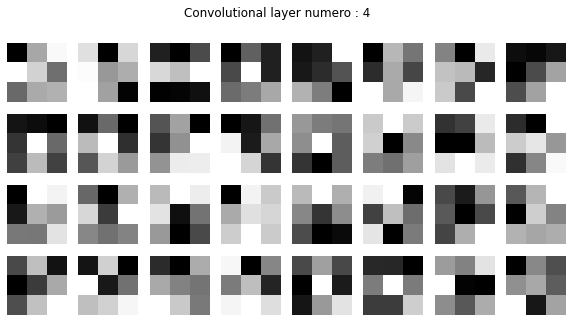

In [32]:
# Third Conv2D Layer --> 64 kernels - 3x3 
layers_number = 4 # je récupère le layer n° 0 (conv2D no 1)
nb_filters = model.layers[layers_number].filters # je récupère le nombre de filtre du layer
subplot_y = int(nb_filters / 4) # je divise par 4 pour le subplot avec le nombre de filtre (ça donnera 4 lignes de X filtres)

# avec tous les éléments du dessus, j'appelle ma fonction pour afficher les kernels
display_kernel(model, layers_number, 4, subplot_y, nb_filters)


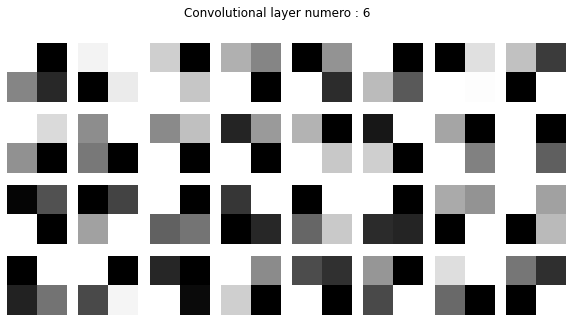

In [33]:
# Fourth/Last Conv2D Layer --> 64 kernels - 2x2
layers_number = 6 # je récupère le layer n° 0 (conv2D no 1)
nb_filters = model.layers[layers_number].filters # je récupère le nombre de filtre du layer
subplot_y = int(nb_filters / 4) # je divise par 4 pour le subplot avec le nombre de filtre (ça donnera 4 lignes de X filtres)

# avec tous les éléments du dessus, j'appelle ma fonction pour afficher les kernels
display_kernel(model, layers_number, 4, subplot_y, nb_filters)


We can also inspect the number of weights involved in our Dense layers 👇:

In [40]:
# Weights and biases of the hidden Dense layer
weights, biases = model.layers[-2].get_weights()
print("Weights",weights)
print("biases",biases)

Weights [[-0.16684812 -0.13694741  0.04552043 ...  0.03880398  0.09255803
  -0.04787397]
 [ 0.10841928 -0.10764492 -0.16503364 ...  0.10130946 -0.06309707
   0.0518523 ]
 [-0.12516549  0.14385983 -0.13053113 ...  0.09359355 -0.14341754
  -0.0039786 ]
 ...
 [ 0.06568757 -0.09866677 -0.03421848 ...  0.0719826   0.13941896
   0.02068786]
 [-0.00223997  0.09085314  0.05992777 ...  0.0653315   0.11016241
  -0.05014394]
 [ 0.09756036 -0.09825597 -0.0616313  ... -0.0858295   0.02677226
  -0.08053815]]
biases [ 7.10756844e-03  7.53623154e-03  7.57198688e-03  1.15455675e-03
 -7.84959272e-03 -7.35018356e-03  2.74854450e-04  3.52583127e-03
 -7.71528669e-03  7.93833006e-03  1.16633223e-02 -4.73319599e-03
 -1.39217859e-03 -7.42409029e-04  0.00000000e+00  0.00000000e+00
  1.96455065e-02 -2.73298728e-03  2.02479195e-02  0.00000000e+00
  5.05457306e-03  0.00000000e+00  7.33551243e-03  5.71001647e-03
  0.00000000e+00  0.00000000e+00 -1.51467288e-03 -1.29405831e-04
  0.00000000e+00  9.10187140e-03  3.77

In [38]:
# Weights and biases of the prediction dense layer
weights, biases = model.layers[-1].get_weights()
print("Weights",weights)
print("biases",biases)

Weights [[ 0.04469683]
 [ 0.06567668]
 [ 0.10659561]
 [ 0.07550154]
 [-0.11294054]
 [ 0.13998546]
 [ 0.11936332]
 [ 0.06080921]
 [-0.07685074]
 [ 0.06176317]
 [ 0.14344552]
 [-0.13032782]
 [-0.17398758]
 [ 0.13709696]
 [ 0.06236242]
 [-0.12075673]
 [ 0.16278931]
 [-0.05509283]
 [ 0.03049906]
 [ 0.09457079]
 [ 0.15764152]
 [-0.04062183]
 [ 0.10120382]
 [ 0.01007164]
 [ 0.02398401]
 [ 0.00815347]
 [ 0.07875796]
 [-0.14646234]
 [ 0.10009484]
 [ 0.06301421]
 [-0.14729656]
 [-0.11288519]
 [ 0.10550234]
 [ 0.03542244]
 [ 0.14796956]
 [-0.08567222]
 [ 0.07394086]
 [ 0.07431385]
 [ 0.07721651]
 [ 0.14052045]
 [ 0.12184517]
 [-0.07609388]
 [ 0.05762052]
 [ 0.1128324 ]
 [ 0.10026461]
 [ 0.0755107 ]
 [-0.08467901]
 [ 0.0850359 ]
 [-0.02296946]
 [ 0.09307881]
 [ 0.10970197]
 [ 0.11539672]
 [ 0.12191651]
 [ 0.03772048]
 [-0.06780979]
 [ 0.07513801]
 [-0.17013066]
 [-0.07039797]
 [ 0.14796501]
 [-0.08038715]
 [-0.13483593]
 [ 0.06543438]
 [-0.14160019]
 [ 0.08514791]
 [ 0.14943628]
 [-0.01995935]
 [

But let's focus our attention on the **`convolutional layers`** a.k.a. **`Conv2D`** !

In [41]:
def get_kernel(layer_number, kernel_number, channel_number):

    weight_or_bias = 0
    k = model.layers[layer_number].weights[0].numpy()[:,
                                                      :,
                                                      channel_number,
                                                      kernel_number]

    return k


# YOUR CODE HERE


---------------------------------------------------------------------------------
 
 
The original picture had 1 channel...
... and we created 16 outputs using 16 kernels...
What are the outputs of those 16 kernels applied to our image ?
 
 
------------------------- Effect of the kernel number 0 -------------------------


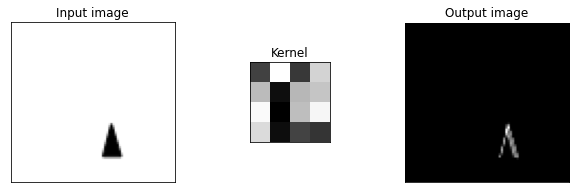

------------------------- Effect of the kernel number 1 -------------------------


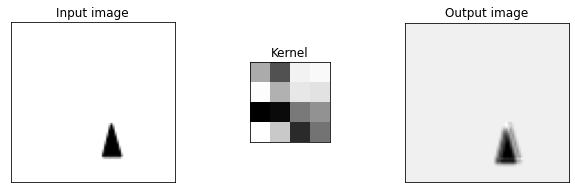

------------------------- Effect of the kernel number 2 -------------------------


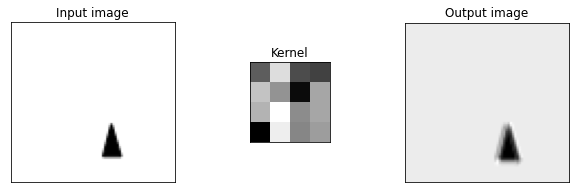

------------------------- Effect of the kernel number 3 -------------------------


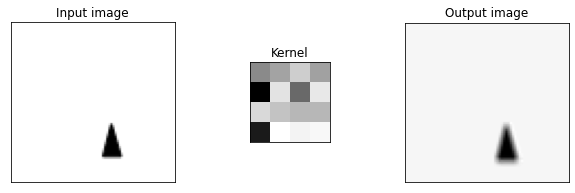

------------------------- Effect of the kernel number 4 -------------------------


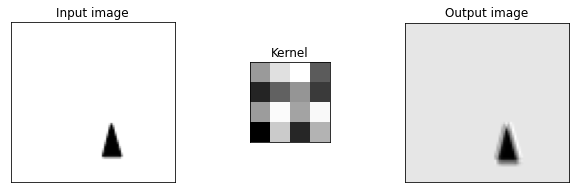

------------------------- Effect of the kernel number 5 -------------------------


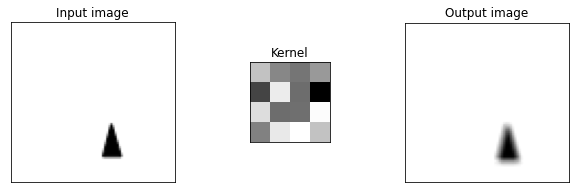

------------------------- Effect of the kernel number 6 -------------------------


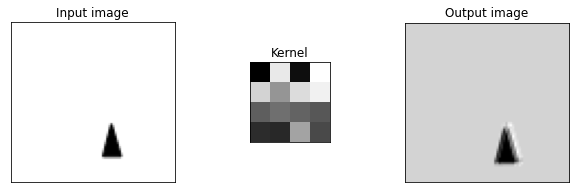

------------------------- Effect of the kernel number 7 -------------------------


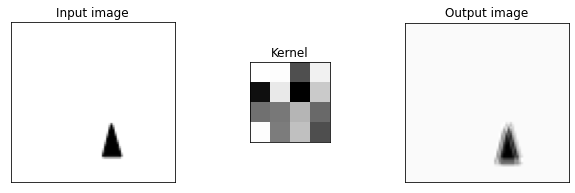

------------------------- Effect of the kernel number 8 -------------------------


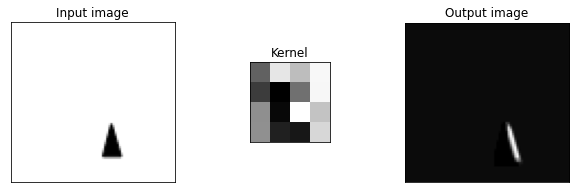

------------------------- Effect of the kernel number 9 -------------------------


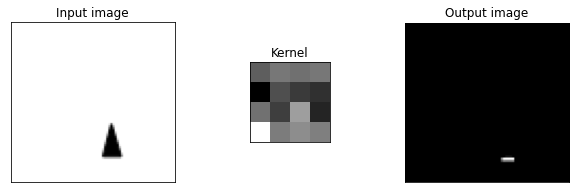

------------------------- Effect of the kernel number 10 -------------------------


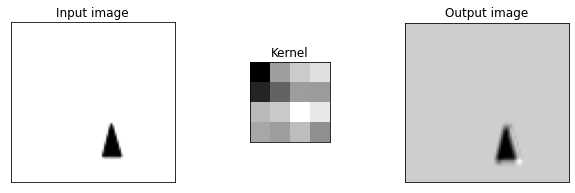

------------------------- Effect of the kernel number 11 -------------------------


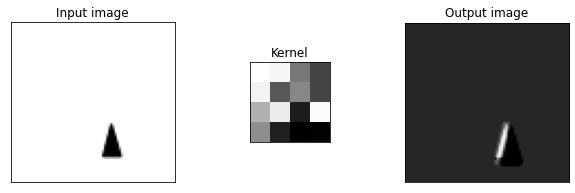

------------------------- Effect of the kernel number 12 -------------------------


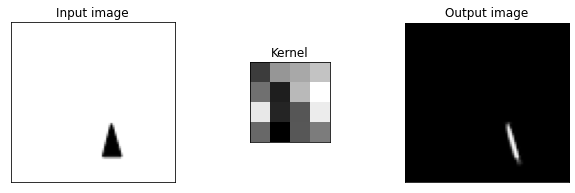

------------------------- Effect of the kernel number 13 -------------------------


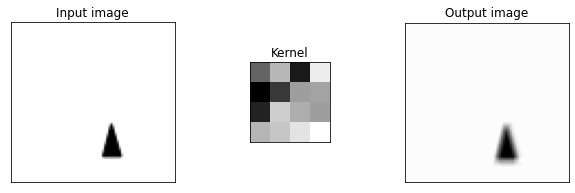

------------------------- Effect of the kernel number 14 -------------------------


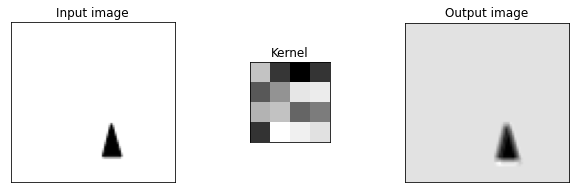

------------------------- Effect of the kernel number 15 -------------------------


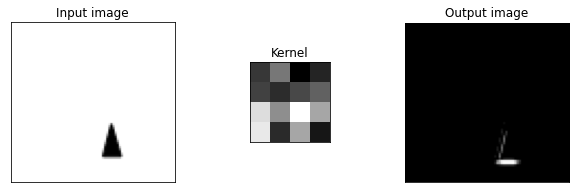

In [42]:
print("-" * 81)
print(" ")
print(" ")

print("The original picture had 1 channel...")
print("... and we created 16 outputs using 16 kernels...")
print("What are the outputs of those 16 kernels applied to our image ?")

print(" ")
print(" ")

for i in np.arange(0,16):
    print(f"------------------------- Effect of the kernel number {i} -------------------------")
    kernel = get_kernel(0, i, 0)
    plot_convolution(X[1], kernel, activation=True)

---------------------------------------------------------------------------------
 
 
The original picture had 1 channel...
... and we created 32 outputs using 32 kernels...
What are the outputs of those 32 kernels applied to our image ?
 
 
------------------------- Effect of the kernel number 0 -------------------------


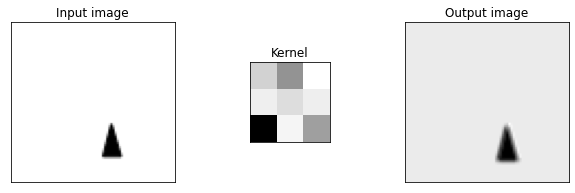

------------------------- Effect of the kernel number 1 -------------------------


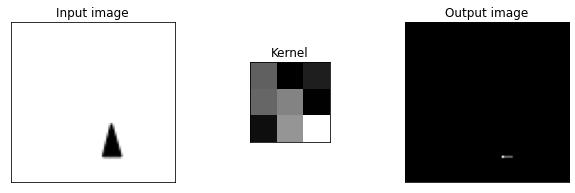

------------------------- Effect of the kernel number 2 -------------------------


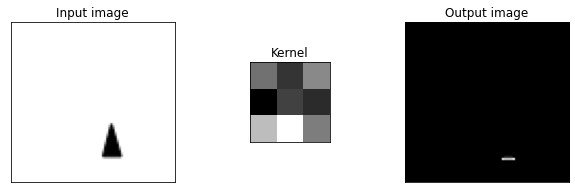

------------------------- Effect of the kernel number 3 -------------------------


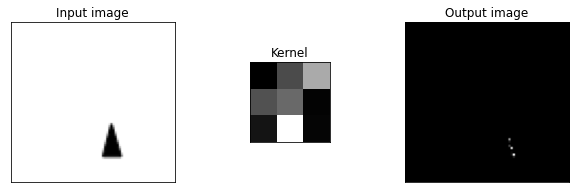

------------------------- Effect of the kernel number 4 -------------------------


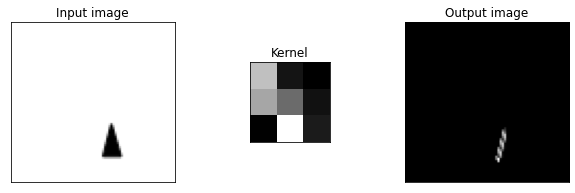

------------------------- Effect of the kernel number 5 -------------------------


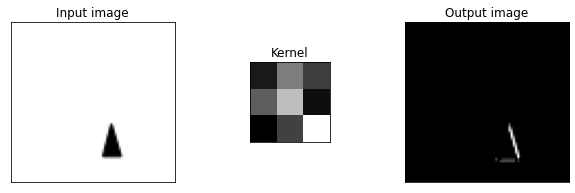

------------------------- Effect of the kernel number 6 -------------------------


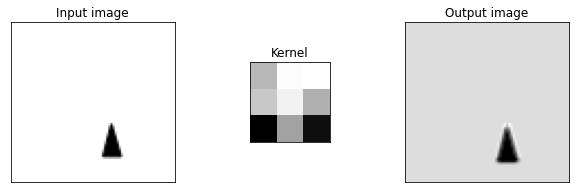

------------------------- Effect of the kernel number 7 -------------------------


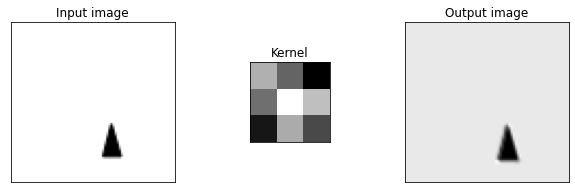

------------------------- Effect of the kernel number 8 -------------------------


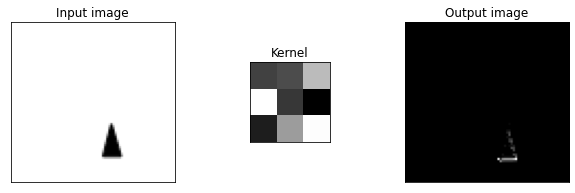

------------------------- Effect of the kernel number 9 -------------------------


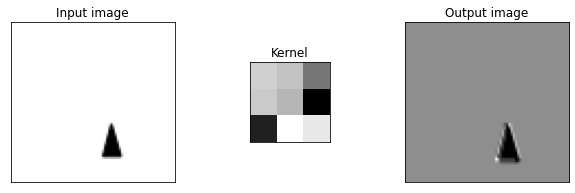

------------------------- Effect of the kernel number 10 -------------------------


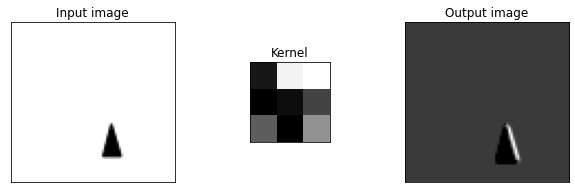

------------------------- Effect of the kernel number 11 -------------------------


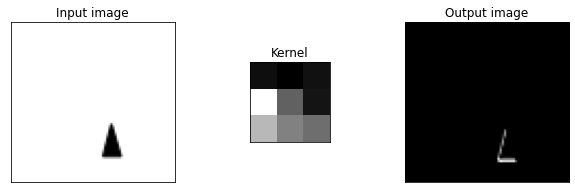

------------------------- Effect of the kernel number 12 -------------------------


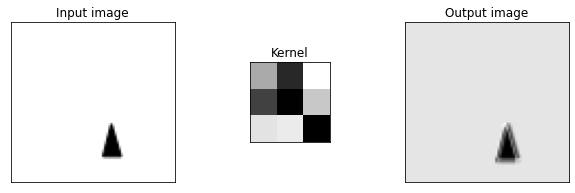

------------------------- Effect of the kernel number 13 -------------------------


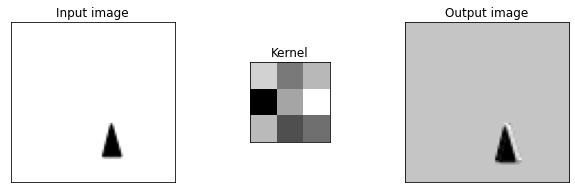

------------------------- Effect of the kernel number 14 -------------------------


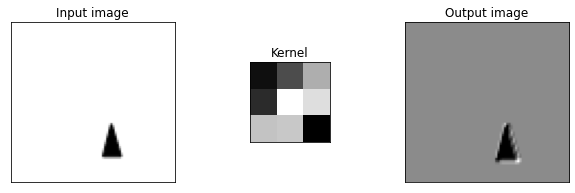

------------------------- Effect of the kernel number 15 -------------------------


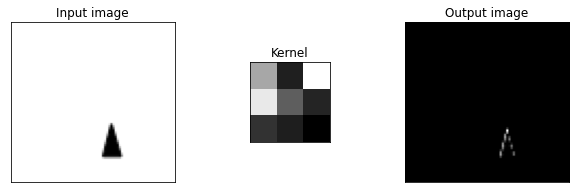

------------------------- Effect of the kernel number 16 -------------------------


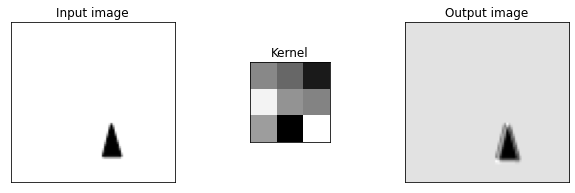

------------------------- Effect of the kernel number 17 -------------------------


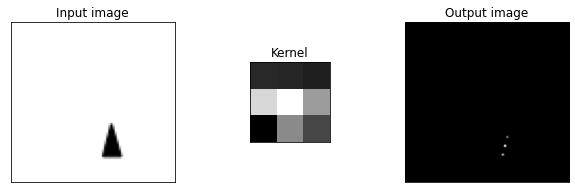

------------------------- Effect of the kernel number 18 -------------------------


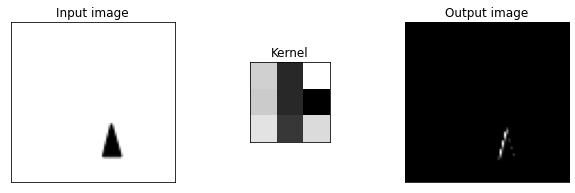

------------------------- Effect of the kernel number 19 -------------------------


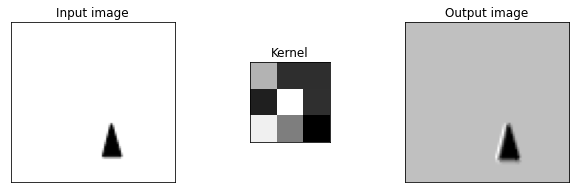

------------------------- Effect of the kernel number 20 -------------------------


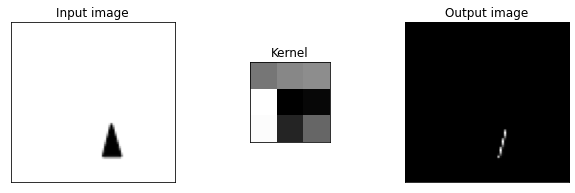

------------------------- Effect of the kernel number 21 -------------------------


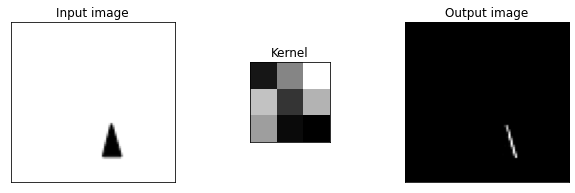

------------------------- Effect of the kernel number 22 -------------------------


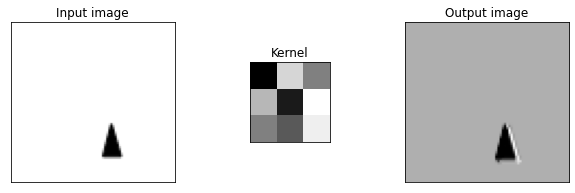

------------------------- Effect of the kernel number 23 -------------------------


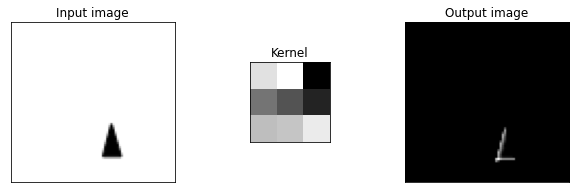

------------------------- Effect of the kernel number 24 -------------------------


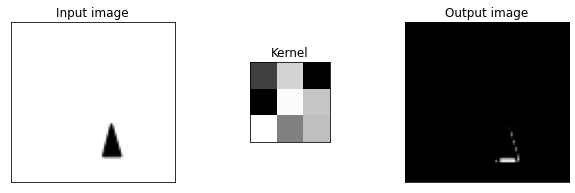

------------------------- Effect of the kernel number 25 -------------------------


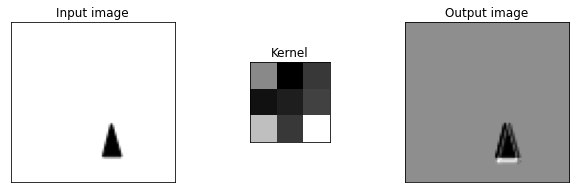

------------------------- Effect of the kernel number 26 -------------------------


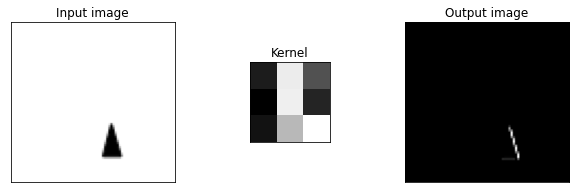

------------------------- Effect of the kernel number 27 -------------------------


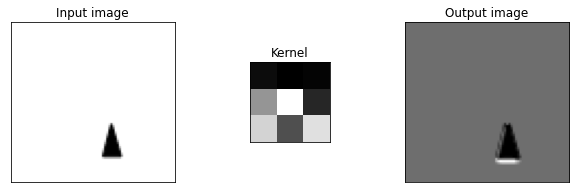

------------------------- Effect of the kernel number 28 -------------------------


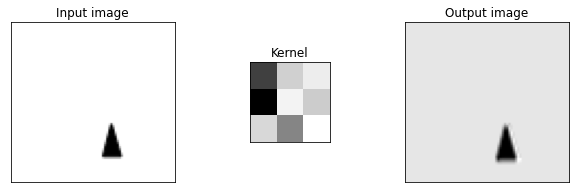

------------------------- Effect of the kernel number 29 -------------------------


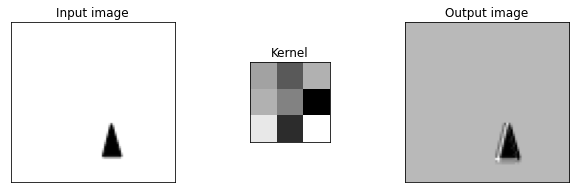

------------------------- Effect of the kernel number 30 -------------------------


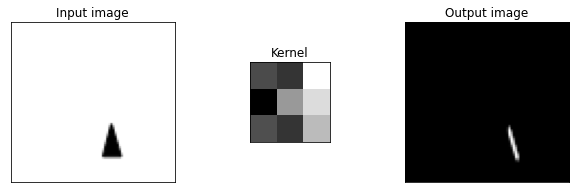

------------------------- Effect of the kernel number 31 -------------------------


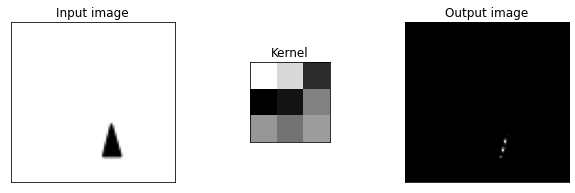

In [94]:
print("-" * 81)
print(" ")
print(" ")

print("The original picture had 1 channel...")
print("... and we created 32 outputs using 32 kernels...")
print("What are the outputs of those 32 kernels applied to our image ?")

print(" ")
print(" ")

for i in np.arange(0,32):
    print(f"------------------------- Effect of the kernel number {i} -------------------------")
    kernel = get_kernel(2, i, 0)
    plot_convolution(X[1], kernel, activation=True)

## Activations

* 👀 We have been looking at the activation ("`output image`") of the **first layer** only.


* 🤔 What if we want to **visualize the activation of the CNN after the second convolutional layer** ?
    1. We need to compute the activations after the first layer, 
    2. then run the MaxPooling operation
    3. and eventually the  second convolution operations
    
  🥵 Quite a tedious process, right ?

😇 Have a look at the cell down below, we provided you with a **`function to retrieve an activation`** based on :
* the *`image_number`*
* the *`layer_number`*
* the *`kernel_number`*

🎁 It computes the different activations through the entire network and store them in a list

💡 *Remark*: It uses the  `tensorflow.keras` `Fonctional API` syntax!

❓ Run the following cells step by step:

**Step 1 : list all the layers' outputs of your CNN**

In [59]:
# List all the layers outputs
#layers_outputs
# Get the output of each layer
for i in range(len(model.layers)):
    layers_output = model.get_layer(index=i).output
    print(f"Output of layer {i}: {layers_output}\n")

Output of layer 0: KerasTensor(type_spec=TensorSpec(shape=(None, 73, 75, 16), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")

Output of layer 1: KerasTensor(type_spec=TensorSpec(shape=(None, 36, 37, 16), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")

Output of layer 2: KerasTensor(type_spec=TensorSpec(shape=(None, 34, 35, 32), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")

Output of layer 3: KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 32), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")

Output of layer 4: KerasTensor(type_spec=TensorSpec(shape=(None, 15, 15, 32), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")

Output of layer 5: KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 32), dtype=tf.float32, 

* There are `4 (Conv2D, MaxPooling2D)` couples which represent $ 4 \times 2 = 8 $ layers
* Followed by :
    * a `Flatten Layer`
    * a `Hidden Layer`
    * a `Prediction Layer`
    
In total, we have 11 layers, hence 11 layers' outputs.

Among these 11 layers, 4 are Convolutional Layers.

**Step 2: Instantiate 11 sub-models**

In [108]:
# Instanciate 11 sub-models: [layer1, layer1-->layer2, layer1-->layer2-->layer3, ...]
# Re-using already trained weights and biases

from keras.models import Model

# Extract the output of each layer
layer_outputs = [model.layers[i].output for i in range(11)]

# Create a list of sub-models, where each sub-model corresponds to the output of one layer
sub_models = [Model(model.input, output) for output in layer_outputs]

print(layer_outputs)


[<KerasTensor: shape=(None, 73, 75, 16) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 36, 37, 16) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 34, 35, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 17, 17, 32) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 15, 15, 32) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 7, 7, 32) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 6, 6, 32) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'global_max_pooling2d')>, <KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]


**Step 3: Compute the outputs of each submodel**

In [110]:
# Compute the 11 outputs of each sub-model
input_data = X

# Compute the output of each sub-model
sub_model_outputs = [sub_model.predict(input_data) for sub_model in sub_models]


7/7 [==============================] - 0s 12ms/step


**Let's wrap this process into a `get_activation` function** !

🎁 We already wrote the function for you: this function helps you get the activation after any layer, based on :
* the `image_number` of the dataset
* the `layer_number`
* the `kernel_number`

In [103]:
def get_activation(activations, image_number, layer_number, kernel_number):
    '''return activation map for a given layer, image, and kernel number'''
    return activations[layer_number][image_number][:, :, kernel_number]


❓ **Questions** ❓ 

* Choose one image
* Display the activation "images" of each convolutional layer. 
    * Pick for instance the first kernel of each convolutional layer. 
    
***Notes***
1. Notice how the information of an image **flows** through the Convolutional Neural Network.
2. You should see the picture becoming more and more "abstract", of smaller and smaller "dimensions"

In [145]:
#Displayer layers
image_number = 0
layer_number = 4
kernel_number = 31
activation = get_activation(sub_model_outputs, image_number, layer_number, kernel_number)

In [146]:
print(f"We have {len(X)} images: 100 triangles and 100 circles")

We have 200 images: 100 triangles and 100 circles


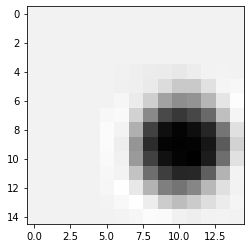

In [147]:
plt.imshow(activation, cmap='gray')

--- Observing the effect of the convolution layer number 1... ---

16 kernels were applied and here are all the activations of this Conv2d Layer:


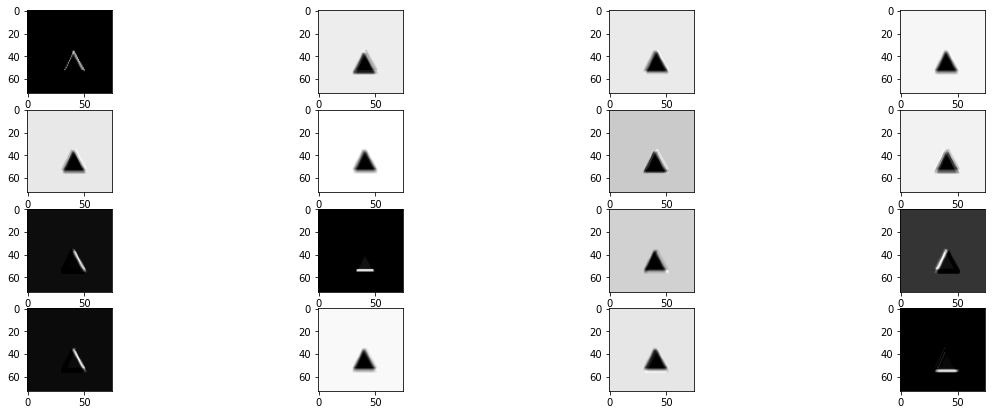

--- Observing the effect of the convolution layer number 2... ---

32 kernels were applied and here are all the activations of this Conv2d Layer:


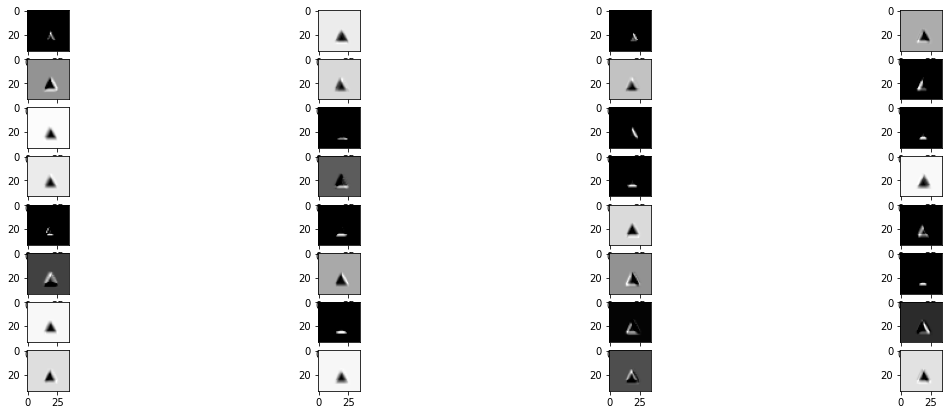

--- Observing the effect of the convolution layer number 3... ---

32 kernels were applied and here are all the activations of this Conv2d Layer:


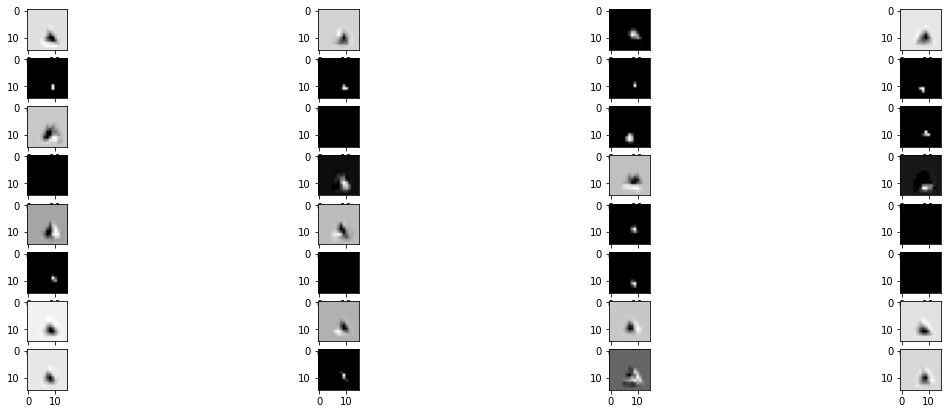

--- Observing the effect of the convolution layer number 4... ---

32 kernels were applied and here are all the activations of this Conv2d Layer:


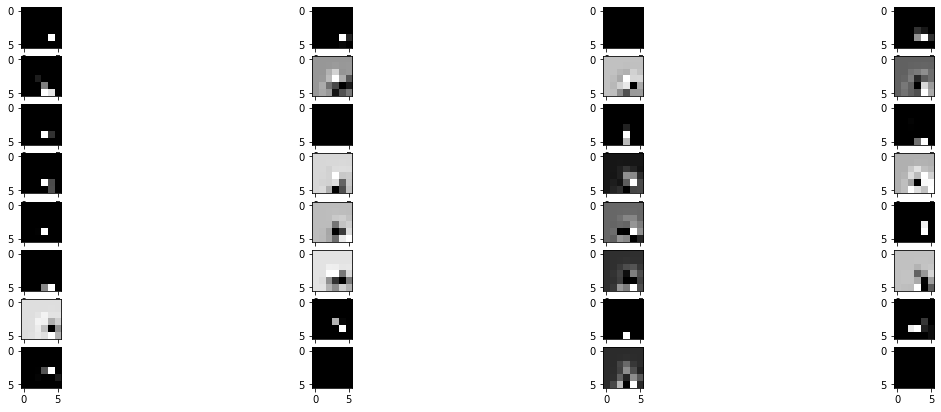

In [141]:
image_number = 3

convolution_layer_number = 1

for layer_number in [0,2,4,6]:
    print(f"--- Observing the effect of the convolution layer number {convolution_layer_number}... ---")
    print("")
    temp_number_kernels = model.layers[layer_number].weights[0].shape[-1]
    print(f"{temp_number_kernels} kernels were applied and here are all the activations of this Conv2d Layer:")
    
    fig, axes = plt.subplots(int(temp_number_kernels/4),4, figsize=(20,7))
    
    
    for ax, kernel_number in zip(axes.flat,range(temp_number_kernels)):
        activation = get_activation(sub_model_outputs, 
                                    image_number=image_number, 
                                    layer_number=layer_number, 
                                    kernel_number=kernel_number)
        ax.imshow(activation, cmap="gray")
    
    plt.show()

    convolution_layer_number += 1


🏁 **Congratulations!**


## Utils (Appendix)

* The following section simply presents the functions that helped us create the dataset with triangles and circles you have been working with.

* They were left at the end of the notebook just in case you want to further prototype and get better understanding of what is going on. 

* But skip this section and go to the next exercise as for now, and come back to it any time later.

In [70]:
def draw_triangle():
    dx = np.random.uniform(0.1, 0.3)
    dy = np.random.uniform(0.1, 0.3)
    noise_x = np.random.uniform(0.0, 0.1)
    noise_y = np.random.uniform(0.0, 0.1)    
    
    x = np.random.uniform(0, 1-dx-noise_x)
    y = np.random.uniform(0, 1-dy)
    X = np.array([[x,y], [x+dx+noise_x,y], [x+dx/2, y+dy+noise_y]])

    t1 = plt.Polygon(X, color='black')
    plt.gca().add_patch(t1)
    
def draw_circle():
    r = np.random.uniform(0.1, 0.25)
    x = np.random.uniform(0+r, 1-r)
    y = np.random.uniform(0+r, 1-r)

    circle1 = plt.Circle((x, y), r, color='black')
    plt.gcf().gca().add_artist(circle1)
    
def create_image(form, path):
    plt.figure(figsize=(1, 1))
    if form == 'circle':
        draw_circle()
    elif form == 'triangle':
        draw_triangle()
    plt.axis('off')
    plt.savefig(path, dpi=80, bbox_inches='tight')
    plt.close()

    
def create_images(path):
    nb_circles = 100
    nb_triangles = 100
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        create_image('circle', c_path)
        
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        create_image('triangle', t_path)

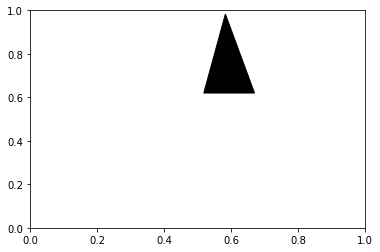

In [71]:
draw_triangle()

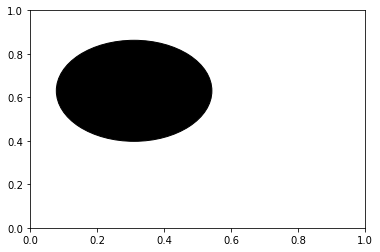

In [72]:
draw_circle()

In [90]:
path_t = "C:/Users/utilisateur/brief_deeplearning/Challenge5/data/triangles/triangle_001"
create_image("triangle", path_t)


In [91]:
path_c = "C:/Users/utilisateur/brief_deeplearning/Challenge5/data/circles/circle_001"
create_image("circle", path_c)